# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np


```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [2]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

data['labels'] = labels
df = pd.DataFrame.from_dict(data, orient='columns')
df = df.set_index('labels')
print(df)

       animal  age  visits priority
labels                             
a         cat  2.5       1      yes
b         cat  3.0       3      yes
c       snake  0.5       2       no
d         dog  NaN       3      yes
e         dog  5.0       2       no
f         cat  2.0       3       no
g       snake  4.5       1       no
h         cat  NaN       1      yes
i         dog  7.0       2       no
j         dog  3.0       1       no


```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [3]:
print(df.describe(include = "all"))
print("\n")
print(df.info(verbose = True))

       animal       age     visits priority
count      10  8.000000  10.000000       10
unique      3       NaN        NaN        2
top       dog       NaN        NaN       no
freq        4       NaN        NaN        6
mean      NaN  3.437500   1.900000      NaN
std       NaN  2.007797   0.875595      NaN
min       NaN  0.500000   1.000000      NaN
25%       NaN  2.375000   1.000000      NaN
50%       NaN  3.000000   2.000000      NaN
75%       NaN  4.625000   2.750000      NaN
max       NaN  7.000000   3.000000      NaN


<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
animal      10 non-null object
age         8 non-null float64
visits      10 non-null int64
priority    10 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes
None


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [4]:
print(df.head(n=3))
print("\n")
print(df.iloc[:3])

       animal  age  visits priority
labels                             
a         cat  2.5       1      yes
b         cat  3.0       3      yes
c       snake  0.5       2       no


       animal  age  visits priority
labels                             
a         cat  2.5       1      yes
b         cat  3.0       3      yes
c       snake  0.5       2       no


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [5]:
print(df[['animal', 'age']])

       animal  age
labels            
a         cat  2.5
b         cat  3.0
c       snake  0.5
d         dog  NaN
e         dog  5.0
f         cat  2.0
g       snake  4.5
h         cat  NaN
i         dog  7.0
j         dog  3.0


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [6]:
rows  =  df.iloc[[3,4,8]]
result = rows.loc[:,['animal', 'age']]
print(result)



       animal  age
labels            
d         dog  NaN
e         dog  5.0
i         dog  7.0


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [7]:
rows  =  df.loc[df['visits']>3]
print(rows)

Empty DataFrame
Columns: [animal, age, visits, priority]
Index: []


```Select the rows where the age is missing, i.e. is `NaN`.```

In [8]:

rows =  df.loc[pd.isna(df['age'])]
print(rows)            

       animal  age  visits priority
labels                             
d         dog  NaN       3      yes
h         cat  NaN       1      yes


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [9]:
rows =  df.loc[(df['animal'] == 'cat') & (df['age'] < 3)]
print(rows) 

       animal  age  visits priority
labels                             
a         cat  2.5       1      yes
f         cat  2.0       3       no


```Select the rows the age is between 2 and 4 (inclusive).```

In [10]:

rows =  df.loc[(df['age'] >= 2) & (df['age'] <= 4)]
print(rows) 

       animal  age  visits priority
labels                             
a         cat  2.5       1      yes
b         cat  3.0       3      yes
f         cat  2.0       3       no
j         dog  3.0       1       no


```Change the age in row 'f' to 1.5.```

In [11]:

df['age']['f'] = 1.5
print(df)


       animal  age  visits priority
labels                             
a         cat  2.5       1      yes
b         cat  3.0       3      yes
c       snake  0.5       2       no
d         dog  NaN       3      yes
e         dog  5.0       2       no
f         cat  1.5       3       no
g       snake  4.5       1       no
h         cat  NaN       1      yes
i         dog  7.0       2       no
j         dog  3.0       1       no


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [12]:

# pandas use
print(df['visits'].sum())

#numpy use
print(np.sum(df['visits']))



19
19


```Calculate the mean age for each different animal in `df`.```

```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [13]:
groups = df.groupby(['animal'])
for animal, group in groups:
    print(str(animal) + " mean age is " + str(group['age'].mean()))
    

cat mean age is 2.3333333333333335
dog mean age is 5.0
snake mean age is 2.5


In [14]:
df.loc['k'] = ['4', 'parrot', 'no', 2]
print(df)
df = df.drop(['k'])
print(df)


       animal     age visits priority
labels                               
a         cat     2.5      1      yes
b         cat       3      3      yes
c       snake     0.5      2       no
d         dog     NaN      3      yes
e         dog       5      2       no
f         cat     1.5      3       no
g       snake     4.5      1       no
h         cat     NaN      1      yes
i         dog       7      2       no
j         dog       3      1       no
k           4  parrot     no        2
       animal  age visits priority
labels                            
a         cat  2.5      1      yes
b         cat    3      3      yes
c       snake  0.5      2       no
d         dog  NaN      3      yes
e         dog    5      2       no
f         cat  1.5      3       no
g       snake  4.5      1       no
h         cat  NaN      1      yes
i         dog    7      2       no
j         dog    3      1       no


```Count the number of each type of animal in `df`.```

In [15]:
animals_dict = dict() 
animals = df['animal'] 
for animal in animals:
  if animal not in animals_dict:
    animals_dict[animal] = 1
  else:
    animals_dict[animal] += 1
    
print(animals_dict)
    
  
   


{'cat': 4, 'snake': 2, 'dog': 4}


```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [16]:
print(df.sort_values(by='age', ascending=False))
print('\n')
print(df.sort_values(by='visits', ascending=True))


       animal  age visits priority
labels                            
i         dog    7      2       no
e         dog    5      2       no
g       snake  4.5      1       no
b         cat    3      3      yes
j         dog    3      1       no
a         cat  2.5      1      yes
f         cat  1.5      3       no
c       snake  0.5      2       no
d         dog  NaN      3      yes
h         cat  NaN      1      yes


       animal  age visits priority
labels                            
a         cat  2.5      1      yes
g       snake  4.5      1       no
h         cat  NaN      1      yes
j         dog    3      1       no
c       snake  0.5      2       no
e         dog    5      2       no
i         dog    7      2       no
b         cat    3      3      yes
d         dog  NaN      3      yes
f         cat  1.5      3       no


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [17]:

df = df.replace('yes', True)
df = df.replace('no', False)
print(df)



   
  

       animal  age  visits  priority
labels                              
a         cat  2.5       1      True
b         cat  3.0       3      True
c       snake  0.5       2     False
d         dog  NaN       3      True
e         dog  5.0       2     False
f         cat  1.5       3     False
g       snake  4.5       1     False
h         cat  NaN       1      True
i         dog  7.0       2     False
j         dog  3.0       1     False


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [18]:
df = df.replace('snake', 'python')
print(df)

        animal  age  visits  priority
labels                               
a          cat  2.5       1      True
b          cat  3.0       3      True
c       python  0.5       2     False
d          dog  NaN       3      True
e          dog  5.0       2     False
f          cat  1.5       3     False
g       python  4.5       1     False
h          cat  NaN       1      True
i          dog  7.0       2     False
j          dog  3.0       1     False


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [0]:
# told no solution

```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [20]:


data =  { 'age': list(np.random.randint(20, 65, size=1000)),
          'skill':  list(np.random.normal(0.5, 0.3, 1000)),
          'height':  list(np.random.uniform(1.5,2.0,1000))}

df = pd.DataFrame.from_dict(data, orient='columns')
print(df)
    




     age     skill    height
0     42  0.783578  1.563008
1     48  0.555345  1.981793
2     58  0.264622  1.653099
3     60  0.820028  1.727385
4     46  0.528454  1.529373
5     61  1.158867  1.904494
6     59  0.990704  1.564651
7     48  0.581588  1.716828
8     45  0.170369  1.739168
9     47  0.594222  1.804898
10    27  0.817860  1.533459
11    40  0.586118  1.725246
12    54  0.246815  1.712724
13    60  0.682736  1.932279
14    40  0.299821  1.703402
15    57  0.785379  1.991923
16    47  0.644868  1.990323
17    58  0.684344  1.714838
18    26  0.028383  1.543763
19    41  0.207987  1.879103
20    59  0.219055  1.519342
21    43  0.398662  1.806505
22    24  0.192296  1.774315
23    22  0.256310  1.557603
24    41  0.647786  1.577929
25    60  0.008535  1.953220
26    53  0.589807  1.574524
27    37  0.670281  1.900738
28    47  0.527738  1.501132
29    59  0.069553  1.544842
..   ...       ...       ...
970   33  0.810280  1.805804
971   50  0.394190  1.799624
972   48  0.84

```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [21]:

rows_num = len(df.index)
age = df['age']
skill = df['skill']
height = df['height']
salary = [1000*((age[i])**2/1000 +1.7*skill[i]+0.4*np.exp(-(height[i]-1.7)**2)) for i in range(rows_num)]
df['salary'] = salary
print(df)

     age     skill    height       salary
0     42  0.783578  1.563008  3488.646194
1     48  0.555345  1.981793  3617.552040
2     58  0.264622  1.653099  4212.978745
3     60  0.820028  1.727385  5393.748109
4     46  0.528454  1.529373  3402.894998
5     61  1.158867  1.904494  6074.691758
6     59  0.990704  1.564651  5557.935957
7     48  0.581588  1.716828  3692.586175
8     45  0.170369  1.739168  2714.014422
9     47  0.594222  1.804898  3614.799882
10    27  0.817860  1.533459  2508.419359
11    40  0.586118  1.725246  2996.146283
12    54  0.246815  1.712724  3735.521195
13    60  0.682736  1.932279  5139.642094
14    40  0.299821  1.703402  2509.690760
15    57  0.785379  1.991923  4951.468563
16    47  0.644868  1.990323  3672.942526
17    58  0.684344  1.714838  4927.295999
18    26  0.028383  1.543763  1114.604658
19    41  0.207987  1.879103  2421.949555
20    59  0.219055  1.519342  4240.549423
21    43  0.398662  1.806505  2922.213598
22    24  0.192296  1.774315  1300

```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [22]:
data2 = {   'age': [],
           'rows' : [],
           'meanSalary' : [],
           'maxHeight' : []}

groups = df.groupby(['age'])

for age, group in groups:
    
    data2['age'].append(age)
    data2['rows'].append(len(group))
    data2['meanSalary'].append(group['salary'].mean())
    data2['maxHeight'].append(group['height'].max())

df1 = pd.DataFrame.from_dict(data2, orient='columns')
df1 = df1.set_index('age')
print(df1)


print()
print(df)

     rows   meanSalary  maxHeight
age                              
20     16  1709.564268   1.949418
21     31  1684.162742   1.991346
22     24  1647.735500   1.947087
23     21  1916.737854   1.953860
24     26  1671.773015   1.967778
25     17  2051.830552   1.999339
26     21  1984.039651   1.988837
27     18  2000.246287   1.963144
28     26  2164.357193   1.987273
29     26  2066.690117   1.997448
30     24  2103.300822   1.977290
31     26  2098.106726   1.989777
32     21  2372.182374   1.977703
33     27  2348.300991   1.991333
34     19  2469.617798   1.964044
35     23  2285.097478   1.992370
36     19  2451.533841   1.962955
37     16  2553.456530   1.986062
38     23  2623.626664   1.946676
39     23  2873.342111   1.951169
40     14  3013.795939   1.987458
41     27  2965.767446   1.998548
42     16  3123.300337   1.952435
43     15  3025.184842   1.980038
44     27  3035.887705   1.990771
45     19  3249.976202   1.981957
46     24  3486.440664   1.992768
47     24  338

```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [23]:
data2 = {'age': [],
       'meanSalary\heights' : []
        }

groups = df.groupby(['age'])

for age, group in groups:
    data2['age'].append(age)
    data2['meanSalary\heights'].append(group['salary'].mean()/group['height'].sum())

df2 = pd.DataFrame.from_dict(data2, orient='columns')
df2 = df2.set_index('age')
print(df2)


     meanSalary\heights
age                    
20            61.014907
21            30.724153
22            39.740692
23            51.216708
24            36.533918
25            67.495100
26            54.393908
27            62.855960
28            48.172991
29            44.610459
30            50.460644
31            45.839675
32            66.940421
33            49.494846
34            73.113363
35            56.018186
36            76.356582
37            92.816051
38            65.830248
39            72.136712
40           123.665065
41            61.295313
42           110.340498
43           112.688966
44            65.058035
45            98.810975
46            86.057236
47            80.786961
48            85.750856
49            81.029697
50            79.514455
51            99.206016
52            76.747638
53           110.441409
54           126.537750
55           180.024621
56           123.163896
57           129.656037
58           144.946812
59            90

```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]


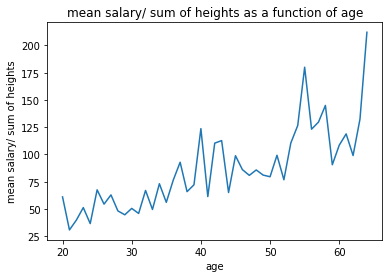

In [24]:
import matplotlib.pyplot as plt

df2_index = df2.index.tolist()
print(df2_index)
plt.figure()
plt.plot(df2_index, df2['meanSalary\heights'])
plt.xlabel("age")
plt.ylabel("mean salary/ sum of heights")
plt.title("mean salary/ sum of heights as a function of age")
plt.show()

```Save the result as a csv```

In [0]:
df2.to_csv("my_data")

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df =  pd.read_csv('house_prices_numeric.csv')
print(df)

FileNotFoundError: ignored

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

In [0]:
# oldest house 
print(df[df['YearBuilt'] == df['YearBuilt'].min()])

In [0]:
# highest price of house in that year
print(df[df['YearBuilt'] == df['YearBuilt'].min()]['SalePrice'].max())

In [0]:
# mean area
print(df['LotArea'].mean())

In [0]:
# 50-percentile of the area (LotArea)
print(df['LotArea'].quantile())

In [0]:
# What is more common: having a fireplace (Fireplaces) in the house, or not having one?
has_fireplace = len(df[df['Fireplaces']>0])
houses_num = len(df['Fireplaces'])
if has_fireplace > houses_num*0.5 :
     print("more has fire place")
else:
    print("more doesnt have fireplace")

In [0]:
# What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
print(df[df['PoolArea'] > 0 ]['SalePrice'].mean())


In [0]:
# How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
groups = df.groupby(['YrSold'])
years  = []
sold = []
for year,group in groups:
    years.append(year)
    sold.append(len(group))


plt.figure()
plt.plot(years,sold)
plt.xlabel("year sold")
plt.ylabel("houses sold")
plt.title("houses sold per year")
plt.show()

In [0]:
# What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
condition = df['OverallCond']
hist = condition.hist()

In [0]:
#  For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, 
# the mean age of the house (we are in 2019) and the count of distinct FullBath values
groups = df.groupby(['Fireplaces'])
data = {'meanPrice' : [],
       'meanAge' : [],
       'FullBath' : [],
       'Fireplaces' : []}
for fire_num,group in groups:
    data['meanPrice'].append(2019 - group['SalePrice'].mean())
    data['meanAge'].append(group['YearBuilt'].mean())
    data['FullBath'].append(len(group['FullBath'].unique()))
    data['Fireplaces'].append(fire_num)
    


df1 = pd.DataFrame.from_dict(data, orient='columns')
df1 = df.set_index('Fireplaces')
print(df)


In [0]:
# Take only houses with MSSubClass > 60. Split into groups according to whether or not the 
# MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual

# a multiple of 20
df1 = df[df['MSSubClass']>60 & (df['MSSubClass'] % 20 == 0)]
# not a multiple of 20
df2 = df[(df['MSSubClass']>60 & (df['MSSubClass'] % 20 != 0))]

data = {'mean':[df1['OverallQual'].mean(), df2['OverallQual'].mean()],
       'min':[df1['OverallQual'].min(), df2['OverallQual'].min()],
       'max':[df1['OverallQual'].max(), df2['OverallQual'].max()], 
       'std':[df1['OverallQual'].std(), df2['OverallQual'].std()],
       'labels':['df1', 'df2']}

df = pd.DataFrame.from_dict(data, orient='columns')
df = df.set_index('labels')
print(df)


## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv('house_prices_larger.csv')

```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [0]:
df['LotArea2'] = df.apply(lambda row: row['LotArea']*10.76391, axis = 1)
df['1st_2nd'] = df.apply(lambda row: row['1stFlrSF']+row['1stFlrSF'], axis = 1)
df['half_GarageArea'] = df.apply(lambda row: row['GarageArea']*0.5, axis = 1)
df['LotArea3'] = df.apply(lambda row: row['LotArea']/(row['BedroomAbvGr']+1), axis = 1)
df['LotArea4'] = df.apply(lambda row: row['LotArea']/(df[df['YearBuilt'] == row['YearBuilt']]['LotArea'].mean()/1e-5), axis = 1)
df = df.sort_values(by='LotArea', ascending=False)
df['LotAreaRank'] = df.reset_index().index+1
df2 = pd.get_dummies(df, prefix=['LotConfig'])
df3 = df.merge(df2)
print(df2)
features = ['LotArea2', '1st_2nd','half_GarageArea', 'LotArea3', 'LotArea4','LotAreaRank',
            'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside'] 

## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge
# df = pd.read_csv('https://raw.githubusercontent.com/roee97/ds_course_ex1/master/house_prices_special.csv')

In [0]:
features_data = df3[features]
target = df3['SalePrice']
data_train , data_test, target_train, target_test = train_test_split(features_data, target, test_size = 0.3)

StandardScaler(data_train)
StandardScaler(target_train)
# StandardScaler(data_test)
# StandardScaler(target_test)

lin_regressor = LinearRegression()
lin_regressor.fit(data_train,target_train )

price_target_fit = lin_regressor.predict(data_test)
price = np.array(target_test)
price_model = np.array(price_target_fit)
StandardScaler(price)
StandardScaler(price_model)
print(mean_squared_error(price, price_model))

plt.scatter(range(len(price)), price, color ='r')
plt.scatter(range(len(price_model)), price_model, color ='b')
plt.title("prediction (blue) vs real price (red)")
plt.xlabel("data number")
plt.ylabel("price")
plt.show()

plt.scatter(price, price_model, color ='r')
plt.title("prediction vs real price")
plt.xlabel("real price")
plt.ylabel("prediction")



In [0]:
data = features_data
squared_data = data.pow(2)
tripled_data = data.pow(3)

data = pd.concat([data, squared_data], axis=1)
data = pd.concat([data, tripled_data], axis=1)
mean_error = []

for i in range(30):
    ridger = Ridge(alpha = i)
    data_train , data_test, target_train, target_test = train_test_split(data, target, test_size = 0.3)
    ridger.fit(data_train, target_train)
    price_target_fit = ridger.predict(data_test)
    price = np.array(target_test)
    price_model = np.array(price_target_fit)
    print(mean_squared_error(price, price_model))
    


##### i got high mean error values and didnt know whats wrong(i tried normalize everything but without success)





